In [ ]:
import tensorflow as tf

# import dataset : mnist

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,x_test),(y_train,y_test) = mnist.load_data()

In [15]:
print(f'x_train shape : {x_train.shape}\ny_train shape : {y_train.shape} \nx_test shape : {x_test.shape} \ny_test {y_test.shape}')

x_train shape : (60000, 28, 28)
y_train shape : (10000, 28, 28) 
x_test shape : (60000,) 
y_test (10000,)


# Plot an example in dataset using matblotlib :

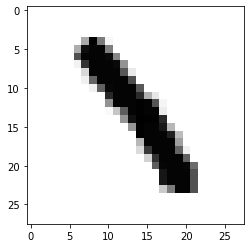

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[134],cmap='binary')
plt.show()

In [ ]:
print(x_test[134])

# One Hot Encoding :

In [14]:
from tensorflow.keras.utils import to_categorical
y_test_encoded = to_categorical(y_test)
x_test_encoded = to_categorical(x_test)

In [13]:
print(f'{x_test[1]} == {x_test_encoded[1]}')

0 == [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# **preprocessing dataset :**

In [25]:
import numpy as np

In [26]:
x_train_reshaped = np.reshape(x_train,(60000,784))
y_train_reshaped = np.reshape(y_train,(10000,784))

In [27]:
print(f'the shape of the x train {x_train_reshaped.shape} ,and the shape of the y_train is {y_train_reshaped.shape}')

the shape of the x train (60000, 784) ,and the shape of the y_train is (10000, 784)


## data normalization :

In [39]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10
print(x_mean,x_std,epsilon)

33.318421449829934 78.56748998339798 1e-10


In [43]:
x_train_norm = (x_train_reshaped-x_mean)/(x_std+epsilon)
y_train_norm = (y_train_reshaped-x_mean)/(x_std+epsilon)

In [46]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# create model :

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model  = Sequential([
     Dense(128,activation='relu',input_shape = (784,)),
     Dense(128,activation='relu'),
     Dense(10,activation='softmax')
])

In [54]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# train and evaluate the model :

In [56]:
model.fit(x_train_norm,x_test_encoded,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1138 - accuracy: 0.9672
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0967 - accuracy: 0.9714
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0831 - accuracy: 0.9757
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9784
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0639 - accuracy: 0.9815
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0570 - accuracy: 0.9830


In [57]:
loss,accuracy = model.evaluate(y_train_norm,y_test_encoded)

313/313 [==============================] - 1s 1ms/step - loss: 0.0891 - accuracy: 0.9734


In [65]:
print(f'The Accuracy of The model is : {round(accuracy*100,2)}%')

The Accuracy of The model is : 97.34%


# predictions :

In [66]:
preds = model.predict(x_train_norm)

In [68]:
print('The shape of the preds {}'.format(preds.shape))

The shape of the preds (60000, 10)


## plot the result :


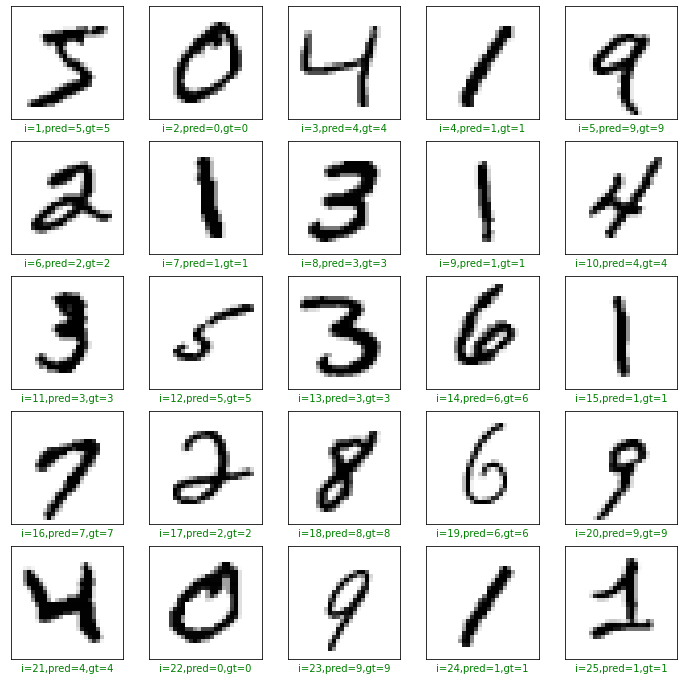

In [73]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):

  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index+i])
  gt = x_test[start_index+i]
  col = 'g'
  if gt!=pred:col='r'
  plt.xlabel(f'i={i+1},pred={pred},gt={gt}',color = col)
  plt.imshow(x_train[start_index+i],cmap='binary')

plt.show()

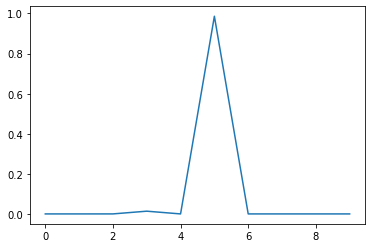

In [77]:
plt.plot(preds[0])
plt.show()
# the max propability is 5